## 데이터와 행렬
- 스칼라 : 숫자 하나만으로 이루어진 데이터
- 벡터 : 여러 숫자가 특정한 순서대로 모여 있는 것을 의미. 하나의 벡터를 이루는 데이터 수가 n기이면 n-차원 벡터라고 함
- 열벡터는 열의 수가 1인 행렬
- 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 데이터 분석에서 일반적인 관례
- 스칼라와 벡터도 수학적으로는 행렬에 속한다.
- 스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다.

### Python Numpy 선형대수

- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)

https://rfriend.tistory.com/380

#### 과제_1013_1 상기 각 항목에 대한 예제를 풀어보세요

#### 단위행렬
단위행렬은 대각원소가 1이고, 나머지는 모두 0인 n차 정방행렬

In [1]:
import numpy as np
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### 대각행렬
대각행렬은 대각성분 이외의 모든 성분이 모두 '0'인 n차 정방행렬

In [3]:
x = np.arange(9).reshape(3,3)
print(x)

np.diag(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([0, 4, 8])

In [4]:
np.diag(np.diag(x))

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

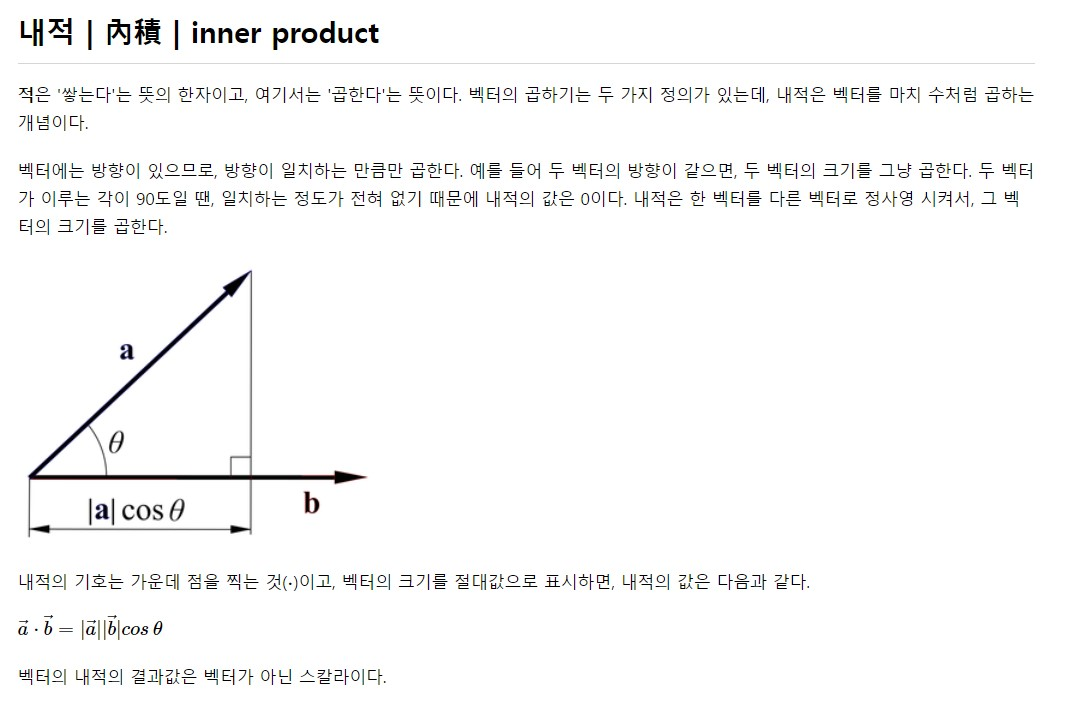

벡터 a를 벡터 b와 같은 방향의 성분과 그렇지 않은 성분으로 분해한다고 할 때 $|a|cosθ$의 길이는 벡터 b와 같은 방향의 성분 길이와 같다.  

벡터 a와 b의 내적은 벡터 b의 길이와 벡터 a에서 벡터 b와 같은 방향의 성분 길이를 곱한 것이다.

- 행렬 내적은 행렬 곱이며 두 행렬 A와 B의 내적은 np.dot()을 이용해 계산이 가능
- 행렬 내적의 특성으로 왼쪽 행렬의 열개수와 오른쪽 행렬의 행개수가 동일해야 내적 연산 가능


#### 내적 

In [5]:
a = np.arange(4).reshape(2, 2)
print(a)

np.dot(a,a)

[[0 1]
 [2 3]]


array([[ 2,  3],
       [ 6, 11]])

In [6]:
a.dot(a)

array([[ 2,  3],
       [ 6, 11]])

#### 대각합
정방행렬의 대각에 위치한 원소를 전부 더해줌

In [7]:
b = np.arange(16).reshape(4,4)
print(b)

np.trace(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


30

In [8]:
# 3차원 행렬의 대각합
c = np.arange(27).reshape(3,3,3)
print(c)

np.trace(c)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


array([36, 39, 42])

- 0 + 12 + 24
- 1 + 13 + 25
- 2 + 14 + 26

= [36, 39, 42]

#### 행렬식
역행렬이 존재하는지 여부를 확인하는 방법

이 행렬식이 '0'이 아니면 역행렬이 존재하고, 이 행렬식이 '0'이면 역행렬이 존재하지 않음

In [9]:
d = np.array([[1,2],[3,4]])
np.linalg.det(d)

-2.0000000000000004

#### 역행렬
- 역행렬은 n차정방행렬 Amn과의 곱이 항등행렬 또는 단위행렬 In이 되는 n차정방행렬을 말함
- A*B 와 B*A 모두 순서에 상관없이 곱했을 때 단위행렬이 나오는 n차정방행렬이 있다면 역행렬이 존재
- 역행렬은 가우스 소거법(Gauss-Jordan elimination method), 혹은 여인수(cofactor method)로 풀 수 있음 


In [10]:
a = np.array(range(4)).reshape(2,2)
print(a)

a_inv = np.linalg.inv(a)
a_inv

[[0 1]
 [2 3]]


array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [11]:
#원래의 행렬에 역행렬을 곱하면, 즉, a.dot(a_inv) 또는 np.dot(a, a_inv) 를 하면 단위행렬(unit matrix)가 되는지 확인

a.dot(a_inv)

array([[1., 0.],
       [0., 1.]])

#### 고유값, 고유벡터
정방행렬 A에 대하여 Ax = λx  (상수 λ) 가 성립하는 0이 아닌 벡터 x가 존재할 때 상수 λ 를 행렬 A의 고유값 (eigenvalue), x 를 이에 대응하는 고유벡터 (eigenvector)

In [12]:
e = np.array([[4,2],[3,5]])
print(e)

w,v = np.linalg.eig(e)
print(w)
print(v)

[[4 2]
 [3 5]]
[2. 7.]
[[-0.70710678 -0.5547002 ]
 [ 0.70710678 -0.83205029]]


In [14]:
print(v[:, 0]) 
print(v[:, 1]) 

[-0.70710678  0.70710678]
[-0.5547002  -0.83205029]


#### 특이값 분해

- 특이값 분해는 고유값 분해(eigen decomposition)처럼 행렬을 대각화하는 한 방법
- 정방행렬뿐만 아니라 모든 m x n 행렬에 대해 적용 가능
- 특이값 분해는 차원축소, 데이터 압축 등에 사용


In [17]:
A = np.array([[3,6],[2,3],[0,0],[0,0]])
print(A, '\n')

u, s, vh = np.linalg.svd(A)

print(u, '\n')
print(s, '\n')
print(vh)

[[3 6]
 [2 3]
 [0 0]
 [0 0]] 

[[-0.8816746  -0.47185793  0.          0.        ]
 [-0.47185793  0.8816746   0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]] 

[7.60555128 0.39444872] 

[[-0.47185793 -0.8816746 ]
 [ 0.8816746  -0.47185793]]


In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.images[0].shape)

(8, 8)


In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

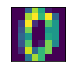

In [4]:
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0])
plt.grid(False);plt.xticks([]);plt.yticks([])
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\admin\scikit_learn_data
[[0.3305785  0.30578512 0.3305785  ... 0.3966942  0.37190083 0.28512397]
 [0.32231405 0.32231405 0.29752067 ... 0.41322315 0.338843   0.2603306 ]
 [0.3264463  0.30991736 0.30578512 ... 0.40495867 0.36363637 0.27272728]
 ...
 [0.16115703 0.16528925 0.1570248  ... 0.14049587 0.1570248  0.16115703]
 [0.1570248  0.17768595 0.16115703 ... 0.14049587 0.1570248  0.1570248 ]
 [0.17768595 0.1694215  0.16528925 ... 0.1446281  0.15289256 0.15289256]] 



Text(0.5, 1.0, 'image 1: $x_1$')

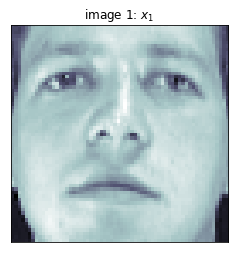

In [5]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.images[6],'\n')
f,ax = plt.subplots(1,1)

ax.imshow(faces.images[6],cmap=plt.cm.bone)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("image 1: $x_1$")

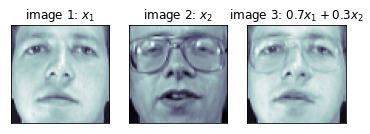

In [8]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f,ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6],cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10],cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]

ax[2].imshow(new_face,cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

In [11]:
import numpy as np

A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C1 = A @ B
C2 = np.dot(A,B)
print(C1,'\n')
print(C2,)

[[22 28]
 [49 64]] 

[[22 28]
 [49 64]]


In [12]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.array([[9,8],[7,6]])

In [14]:
# 내적 시 교환 법칙 성립하지 않음
D1 = A@B
D2 = B@A
print(D1,'\n')
print(D2)

[[19 22]
 [43 50]] 

[[23 34]
 [31 46]]


In [15]:
# 분배 법칙은 성립함
D3 = A@(B+C)
D4 = A@B+A@C
print(D3,'\n')
print(D4)

[[42 42]
 [98 98]] 

[[42 42]
 [98 98]]


In [17]:
# 전치 연산도 덧셈, 뺄셈에 대한 분배 법칙이 성립

T1 = (A+B).T
T2 = A.T+B.T
print(T1,'\n')
print(T2)

[[ 6 10]
 [ 8 12]] 

[[ 6 10]
 [ 8 12]]


In [19]:
# 전치 연산과 곱셈의 경우에는 분배 법칙이 성립하지만, 전치 연산이 분배되면서 곱셈의 순서가 바뀜

T3 = (A@B).T
T4 = B.T@A.T # 순서 바뀜
print(T3,'\n')
print(T4)

[[19 43]
 [22 50]] 

[[19 43]
 [22 50]]


In [20]:
# 항등행렬의 곱셈
A = np.array([[1,2],[3,4]])
I = np.eye(2)
I

array([[1., 0.],
       [0., 1.]])

In [21]:
A@I

array([[1., 2.],
       [3., 4.]])

In [22]:
I@A

array([[1., 2.],
       [3., 4.]])

In [23]:
# 대각합 계산
np.trace(np.eye(3))

3.0

### 행렬식

https://ratsgo.github.io/linear%20algebra/2017/05/21/determinants/

https://www.youtube.com/watch?v=fuVMiyahzH4


In [26]:
import numpy.linalg as LA

d = np.array([[1,0],
             [0,1]])

print(LA.det(d))


# e 에러 : 2차원은 정방 행렬이어야 함
e = np.array([[1,0,0],
             [0,1,1]])

print(LA.det(e))

1.0


In [27]:
e = np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])

print(LA.det(e))

1.0


In [29]:
# Q. 5행 5열 행렬을 생성하고 행렬식으로 부피를 구하세요.

np.random.seed(4)
a = np.array(np.random.randint(0, 5, size=(5, 5)))
print(a)
LA.det(a)

[[2 1 0 0 2]
 [1 2 4 1 0]
 [4 2 4 2 4]
 [3 0 1 0 2]
 [0 1 2 2 0]]


28.00000000000001

#### 선형 연립방정식
- 선형예측모형은 입력 데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 연립방정식과 역행렬을 이용하여 선형 예측 모형의 가중치 벡터를 구할 수 있다.
역행렬
- 정방행렬에 대한 역행렬은 원래의 행렬과 다음 관계를 만족하는 정방행렬을 의미 $A^{-1}A = AA^{-1} = I$, I는 항등행렬


In [30]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
mt1

array([[1, 2, 1],
       [2, 2, 3],
       [1, 3, 1]])

In [31]:
mt2 = np.linalg.inv(mt1)
mt2

array([[ 7., -1., -4.],
       [-1.,  0.,  1.],
       [-4.,  1.,  2.]])

In [32]:
np.dot(mt1, mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [33]:
# Q. 아래 행렬의 역행렬을 구하고 검증하세요.
arr = np.matrix([[1,3],[5,7]])
print(arr)

[[1 3]
 [5 7]]


In [35]:
arr_inv = np.linalg.inv(arr)
arr_inv

matrix([[-0.875,  0.375],
        [ 0.625, -0.125]])

In [36]:
arr.dot(arr_inv)

matrix([[1., 0.],
        [0., 1.]])

## 함수

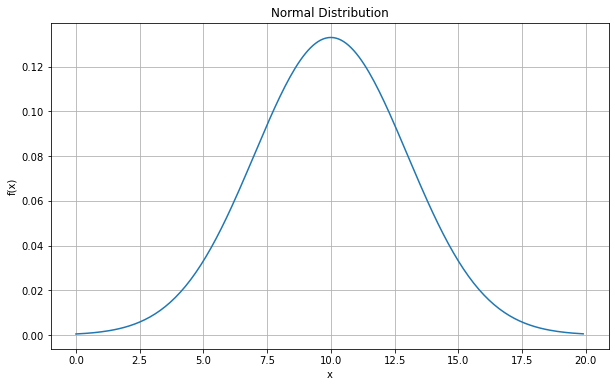

In [41]:
# Q. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.arange(0, 20, 0.1)
plt.figure(figsize=(10,6))
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('f(x)') 
plt.grid()
plt.plot(x, norm.pdf(x, loc=10, scale=3))
plt.show()

#### 정규분포

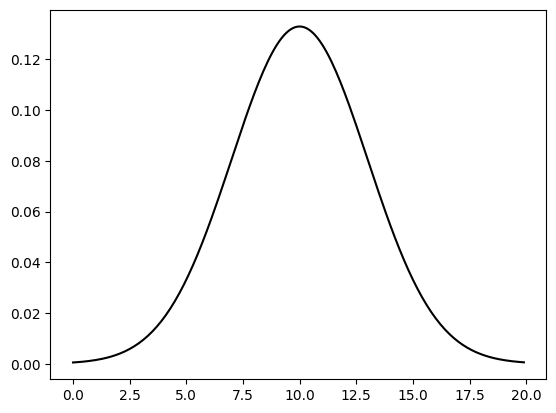

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x_plot = np.arange(0,20,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot, loc=10, scale=3), color='black')

#### 누적분포

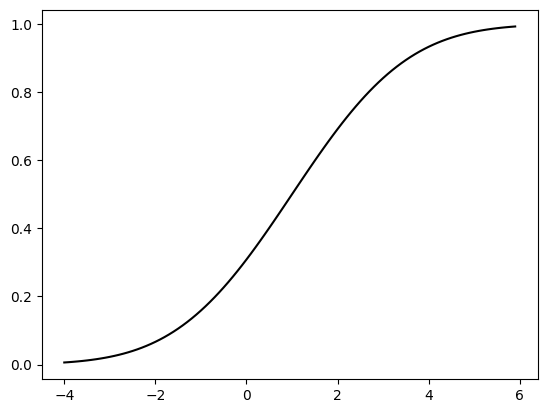

In [8]:
# 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현

x_plot = np.arange(-4,6,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot, loc=1, scale=2), color='black')

#### 역함수
어떤 함수의 입력/출력 관계과 정반대의 입출력 관계를 갖는 함수를 역함수라고 한다. 원래의 함수에서 x축과 y축이 바뀐 것이므로 y=x가 나타내는 직선(원전을 통과하는 기울기 1인 직선)을 대칭축으로 대칭인 함수의 그래프

Text(0.5, 1.0, '역함수의 그래프')

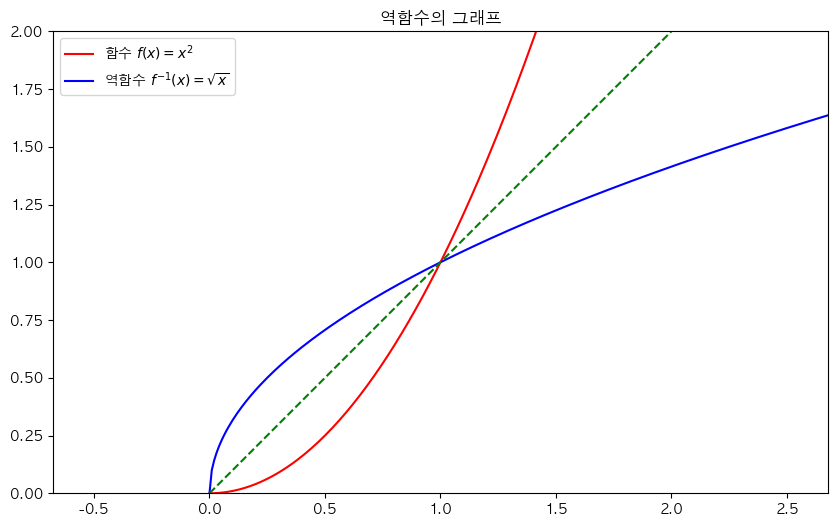

In [10]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def f1(x):
    return x**2

def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0,3,300)
plt.figure(figsize=(10,6))
plt.plot(x, f1(x), "r-", label="함수 $f(x)=x^2$")
plt.plot(x, f1inv(x), "b-", label="역함수 $f^{-1}(x)=\sqrt{x}$")
plt.plot(x,x,"g--")
plt.axis("equal")
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.title("역함수의 그래프")

In [11]:
def f(x):
    return (x**2+1)

def g(x):
    return (np.sqrt(x-1))

xx1 = np.linspace(0.0, 4.0, 200)
xx2 = np.linspace(1.0, 4.0, 200)
yy1 = f(xx1)
yy2 = g(xx2)

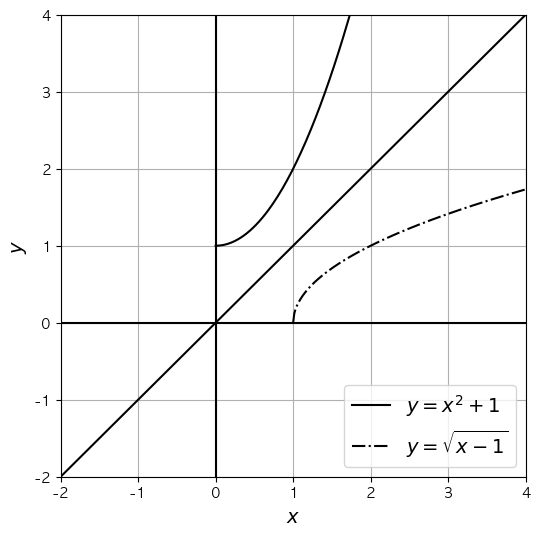

In [12]:
# 역함수의 그래프
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.figure(figsize=(6,6))
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.ylim(-2.0, 4.0)
plt.xlim(-2.0, 4.0)
plt.grid()
plt.plot(xx1,yy1, linestyle='-', c='k', label='$y=x^2+1$')
plt.plot(xx2,yy2, linestyle='-.', c='k', label='$y=\sqrt{x-1}$')
plt.plot([-2,4],[-2,4], color='black')
plt.plot([-2,4],[0,0], color='black')
plt.plot([0,0],[-2,4],color='black')
plt.legend(fontsize=14)

Text(0, 0.5, '$ReLU(x)$')

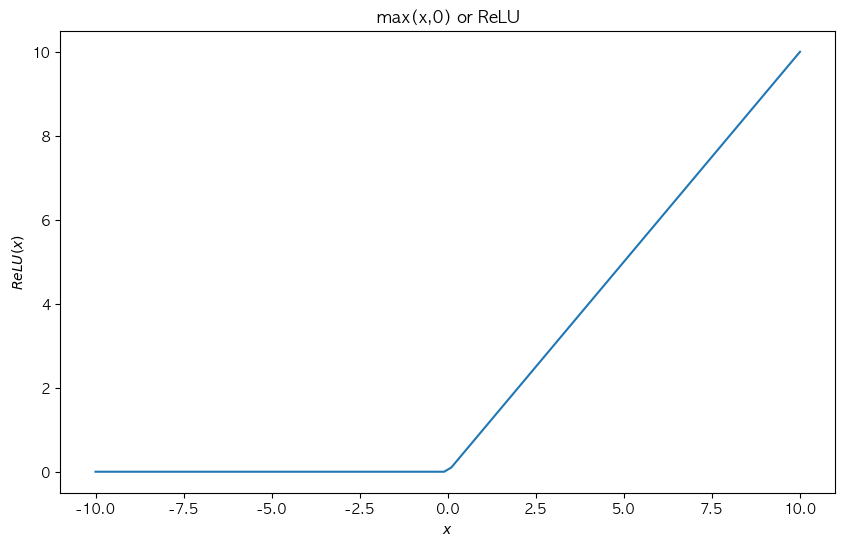

In [14]:
xx = np.linspace(-10,10,100)
plt.figure(figsize=(10,6))
plt.plot(xx,np.maximum(xx,0))
plt.title("max(x,0) or ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")

#### 지수함수
- 정해진 어떤 값을 입력값으로 거듭제곱하여 출력을 구하는 함수
- 거듭 제곱을 할 때 아래에 있는 수를 밑이라고 하며 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱하는 함수를 지수함수라고 한다.
- $y=e^x$, y=exp(x) = exp x 로 표시

In [15]:
np.e

2.718281828459045

In [16]:
np.exp(-10), np.exp(-1), np.exp(-0.1), np.exp(0)

(4.5399929762484854e-05, 0.36787944117144233, 0.9048374180359595, 1.0)

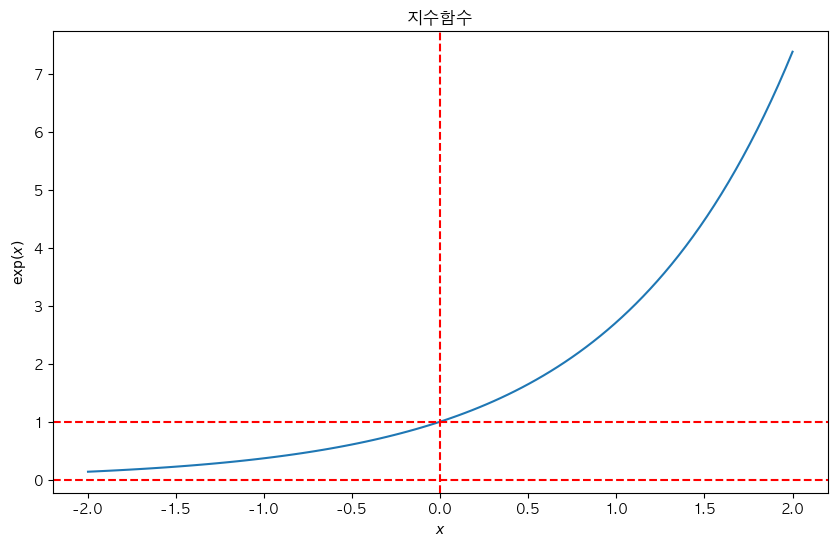

In [20]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.figure(figsize=(10,6))
plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

#### 로지스틱 함수
지수함수를 변형한 함수로 시그모이드 함수의 하나이다.

Text(0, 0.5, '$\\sigma(x)$')

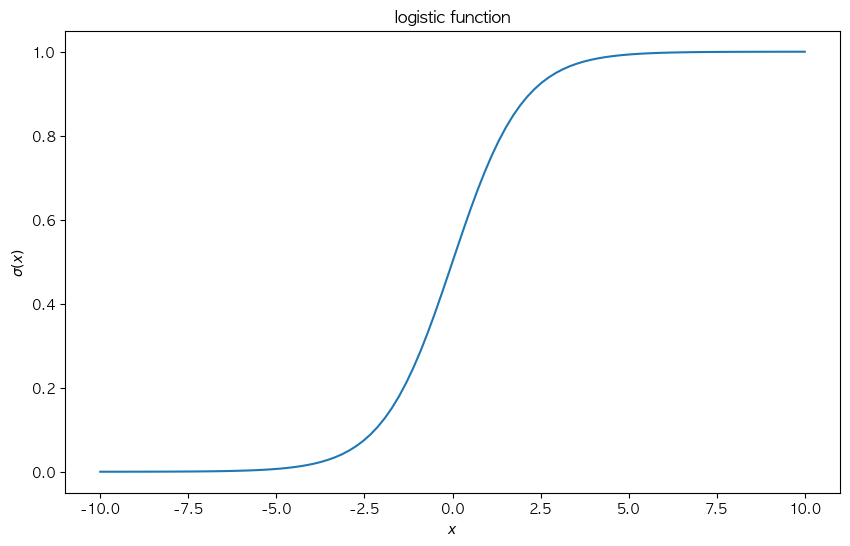

In [21]:
def logistic(x):
    return 1/(1+np.exp(-x))
xx = np.linspace(-10,10,100)
plt.figure(figsize=(10,6))
plt.plot(xx,logistic(xx))
plt.title('logistic function')
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")

#### 로그함수
e를 거듭제곱하여 특정한 값이 되는 수를 찾을 필요가 있는데 e를 몇 제곱해야 10이라는 값이 될까? e를 2.3025851 거듭제곱하면 10이 된다. e를 거듭제곱하여 특정한 수 a가 되도록 하는 수를 log a라 표기하고 로그라고 읽는다.

In [22]:
np.exp(2), np.exp(3), np.exp(2.3024851)

(7.38905609893065, 20.085536923187668, 9.999000120050873)

In [24]:
np.log(7.38905609893065), np.log(20.08553), np.log(10)

(2.0, 2.999999655314723, 2.302585092994046)

Text(0, 0.5, '$\\log(x)$')

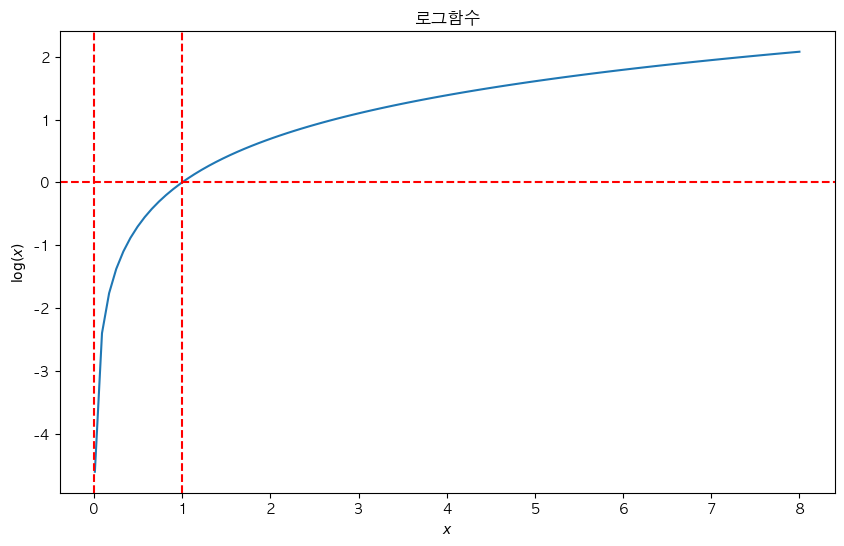

In [26]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.figure(figsize=(10,6))
plt.title("로그함수")
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")

### 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신명망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4

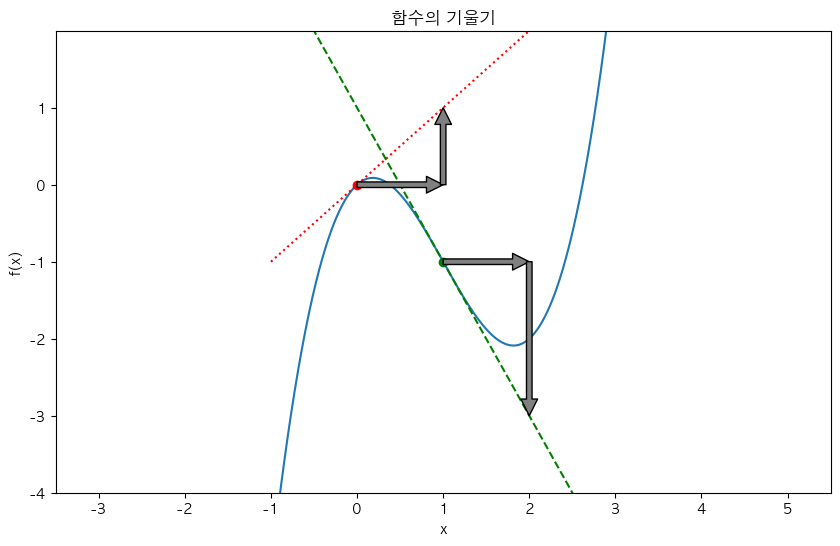

In [27]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

Text(0.5, 1.0, 'delta = 0.0100')

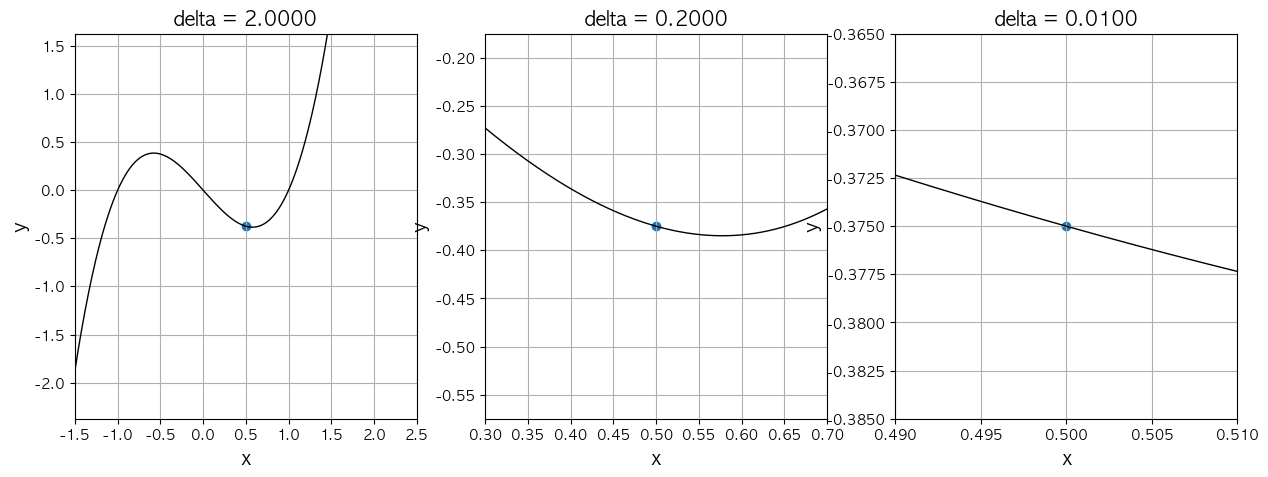

In [29]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[0], fontsize=14)

x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)


### 접선의 방정식
- 함수 f(x)에서 x의 값을 dx만틈 변화시켰을 때 f(x)의 변화량 (f(x_dx)-f(x))는 f'(x)dx와 같다
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 순간 변화율을 의미
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x)=$x^2$

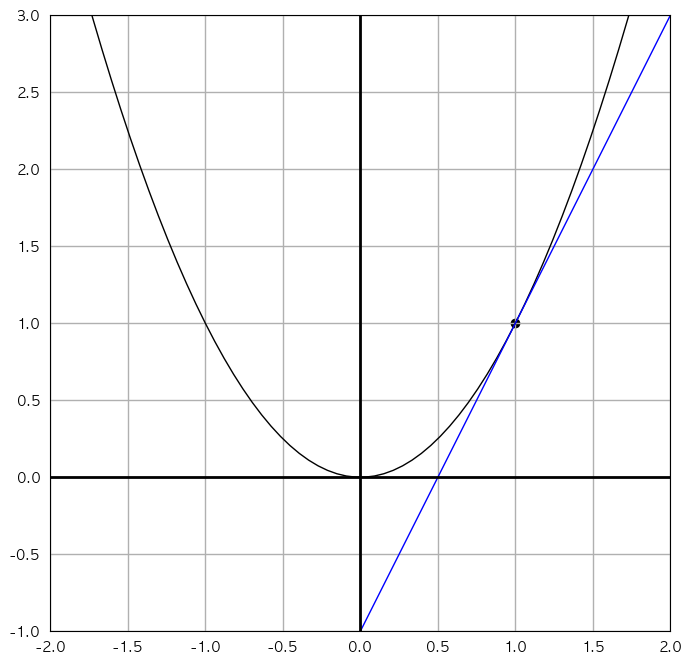

In [32]:
x  = np.linspace(-4, 4, 100)

def f(x):
    return (x**2)
def g(x):
    return (2*x -1)

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')

In [33]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 7.4 MB/s eta 0:00:00a 0:00:01


In [38]:
import sympy
x,y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

x**2 + 4*x*y + 4*y**2

In [39]:
# diff() 함수로 미분, 변수, 상수를 구분하기 위하여 편미분인 것처럼 입력 변수 지정

sympy.diff(f,x)

2*x + 4*y

In [40]:
sympy.diff(f,y)

4*x + 8*y

## 적분
- 적분은 미분과 반대되는 개념. 부정적분과 정적분이 있다.
 - 부정적분은 정확하게 미분과 반대되는 개념. 즉 반 미분이다. 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 f(x)에 대한 미분되기 전의 원래의 함수를 찾는 과정 또는 그 결과를 의미
 - 정적분은 독립변수 x가 어떤 구간 [a,b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x축)이 이루는 면적을 구하는 행위 혹은 그 값을 의미
 
적분의 개념 : https://www.youtube.com/watch?v=kV2j3S5qBm4

미분과 적분의 관계 : https://www.youtube.com/watch?v=xAAAvj7bmKQ

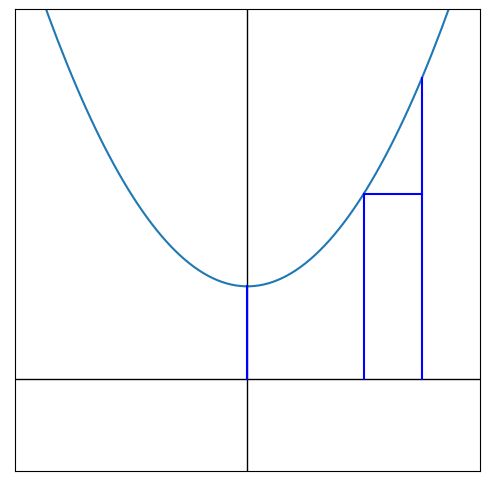

In [41]:
def f(x) :
    return x**2 + 1
xx = np.linspace(-4.0, 4.0, 200)
yy = f(xx)

plt.figure(figsize=(6,6))
plt.xlim(-2,2)
plt.ylim(-1,4)
plt.plot(xx, yy)
plt.plot([-2,2],[0,0],c='k',lw=1)
plt.plot([0,0],[-1,4],c='k',lw=1)
plt.plot([0,0],[0,f(0)],c='b')
plt.plot([1,1],[0,f(1)],c='b')
plt.plot([1.5,1.5],[0,f(1.5)],c='b')
plt.plot([1,1.5],[f(1),f(1)],c='b')
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')

(0.0, 8.0)

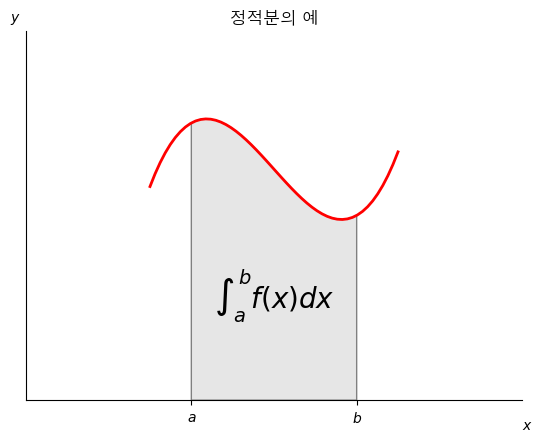

In [42]:
from matplotlib.patches import Polygon


def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("정적분의 예")
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)